# DNN classifier

# Step 1:

### import Modules

In [35]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

%matplotlib inline

# Step 2: 

### Process Data

In [2]:
def Data_Process():
    
    """
    This will read the CSV and Normalize the Data and
    Perform Train Test Split and Return
    X_Train, X_Test, Y_Train, Y_Test
    
    """
    # Name for the column  or Features Map
    columns_to_named = ["Pregnancies","Glucose","BloodPressure",
           "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",
           "Age","Class"]
    
    # Read the Dataset and Rename the Column
    df = pd.read_csv("pima-indians-diabetes.csv",header=0,names=columns_to_named)

    col_norm =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
    
    # Normalization using Custom Lambda Function
    
    df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
    
    X_Data = df1_norm
    Y_Data = df["Class"]
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)
    
    return X_Train, X_Test, Y_Train, Y_Test

# Step 3:

### create a feature column

In [3]:
def create_feature_column():
    
    feat_Pregnancies = tf.feature_column.numeric_column('Pregnancies')
    feat_Glucose = tf.feature_column.numeric_column('Glucose')
    feat_BloodPressure = tf.feature_column.numeric_column('BloodPressure')
    feat_SkinThickness_tricep = tf.feature_column.numeric_column('SkinThickness')
    feat_Insulin = tf.feature_column.numeric_column('Insulin')
    feat_BMI = tf.feature_column.numeric_column('BMI')
    feat_DiabetesPedigreeFunction  = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
    
    feature_column = [feat_Pregnancies, feat_Glucose, feat_BloodPressure, 
                  feat_SkinThickness_tricep, feat_Insulin, 
                 feat_BMI , feat_DiabetesPedigreeFunction] 
    
    return feature_column

In [24]:
X_Train, X_Test, Y_Train, Y_Test = Data_Process()
feature_column = create_feature_column()


input_func = tf.estimator.inputs.pandas_input_fn(X_Train, 
                                                 Y_Train,
                                                 batch_size=50,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func = tf.estimator.inputs.pandas_input_fn(X_Test,
                                               Y_Test,
                                               batch_size=50,
                                               num_epochs=1,
                                               shuffle=False)
predict_input_fn = tf.estimator.inputs.pandas_input_fn(
      x=X_Test,
      num_epochs=1,
      shuffle=False)


# Step 4

### create a DNN model

In [5]:
dnnmodel = tf.estimator.DNNClassifier(
                                        hidden_units = [20,20],
                                        feature_columns = feature_column,
                                        n_classes=2,
                                        activation_fn=tf.nn.softmax,
                                        dropout=None,
                                        optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmplkjh328o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2c2619e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Step 5:

### Train

In [8]:
history = dnnmodel.train(input_fn=input_func, 
               steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmplkjh328o/model.ckpt-500
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 500 into /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmplkjh328o/model.ckpt.
INFO:tensorflow:loss = 23.30974, step = 501
INFO:tensorflow:global_step/sec: 329.675
INFO:tensorflow:loss = 17.35662, step = 601 (0.305 sec)
INFO:tensorflow:global_step/sec: 509.879
INFO:tensorflow:loss = 23.774925, step = 701 (0.198 sec)
INFO:tensorflow:global_step/sec: 469.215
INFO:tensorflow:loss = 27.483475, step = 801 (0.211 sec)
INFO:tensorflow:global_step/sec: 436.321
INFO:tensorflow:loss = 30.025085, step = 901 (0.232 sec)
INFO:tensorflow:Sav

### Test

In [9]:
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-17T16:21:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmplkjh328o/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-17-16:22:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.80263376, auc_precision_recall = 0.683012, average_loss = 0.5132714, global_step = 1000, label/mean = 0.35064936, loss = 23.713139, precision = 0.6527778, prediction/mean = 0.3578292, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmplkjh328o/model.ckpt-1000


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80263376,
 'auc_precision_recall': 0.683012,
 'average_loss': 0.5132714,
 'label/mean': 0.35064936,
 'loss': 23.713139,
 'precision': 0.6527778,
 'prediction/mean': 0.3578292,
 'recall': 0.5802469,
 'global_step': 1000}

### Predict

In [42]:
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmplkjh328o/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### Analysis

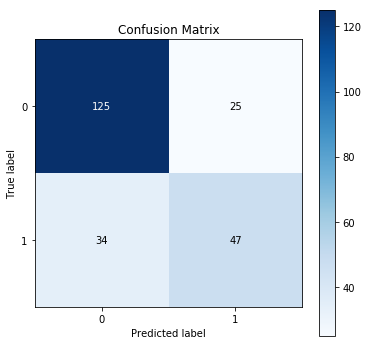

In [46]:
skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                   figsize=(6,6),
                                   title="Confusion Matrix")

In [44]:
print(data)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.58      0.61        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

